# Exploratory Data Analysis of Smart Meter Data

## Preliminaries

#### a. Download the dataset files from https://doi.org/10.7910/DVN/GOCHJH.


Also, read the *CEEW.txt* file carefully to understand the list of columns and their descriptions.

#### b. Install the necessary Python libraries such as Pandas, Numpy, and Matplotlib and Import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 1. Loading the Dataset

#### a. Load individual datasets and combine them into the single dataframe

In [2]:
# Define the parent directory where the folders are located
parent_dir = 'data'

# Use glob to find all CSV files in different folders
all_files = glob.glob(os.path.join(parent_dir, '**', '*.csv'), recursive=True)

# Initialize an empty list to hold dataframes
dataframes = []

# Iterate over the list of files and read each one into a dataframe
for file in all_files:
    d = pd.read_csv(file)  
    dataframes.append(d)

# Concatenate all dataframes into one
df = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
print(df.head())

           x_Timestamp  t_kWh  z_Avg Voltage (Volt)  z_Avg Current (Amp)  \
0  2019-07-10 00:00:00  0.021                243.10                 1.79   
1  2019-07-10 00:03:00  0.021                242.91                 1.80   
2  2019-07-10 00:06:00  0.021                242.46                 1.83   
3  2019-07-10 00:09:00  0.020                241.27                 1.79   
4  2019-07-10 00:12:00  0.020                240.77                 1.79   

   y_Freq (Hz) meter  
0        50.02  BR02  
1        50.07  BR02  
2        50.00  BR02  
3        49.95  BR02  
4        49.98  BR02  


In [3]:
df.shape

(21394429, 6)

In [4]:
df.loc[(df['meter'] == 'MH23') & (df['t_kWh'] == 0.021)]

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter
15173566,2019-05-09 07:57:00,0.021,248.85,2.06,50.05,MH23
15173568,2019-05-09 08:03:00,0.021,248.29,1.97,50.05,MH23
15173569,2019-05-09 08:06:00,0.021,248.48,1.96,50.02,MH23
15173570,2019-05-09 08:09:00,0.021,248.57,1.96,50.04,MH23
15173571,2019-05-09 08:12:00,0.021,249.08,1.96,50.03,MH23
...,...,...,...,...,...,...
21113355,2021-02-15 10:18:00,0.021,245.71,3.22,49.98,MH23
21113469,2021-02-15 16:00:00,0.021,244.96,2.51,50.10,MH23
21113816,2021-02-16 09:21:00,0.021,237.16,1.84,50.01,MH23
21114280,2021-02-17 08:33:00,0.021,237.41,1.82,49.97,MH23


#### b. Print the number of unique meters from this dataset

In [5]:
n = len(df['meter'].unique())
print("No. of unique meters :", n)

No. of unique meters : 84


## 2. Pre-processing of electricity consumption (t_kWh)

#### a. Set `x_Timestamp` as index and drop all columns except `meter ` and electricity consumption (`t_kWh`) variables.

Note that the column *x_Timestamp* is in datatime format. So convert this column in to Pandas  datetime format and set this as index of the loaded dataframe.

In [6]:
df_p = df.copy()

In [7]:
df_p.columns

Index(['x_Timestamp', 't_kWh', 'z_Avg Voltage (Volt)', 'z_Avg Current (Amp)',
       'y_Freq (Hz)', 'meter'],
      dtype='object')

In [8]:
df_p.drop(columns=['z_Avg Voltage (Volt)', 'z_Avg Current (Amp)', 'y_Freq (Hz)',], inplace=True)

In [9]:
df_p['x_Timestamp'] = pd.to_datetime(df_p['x_Timestamp'])
df_p = df_p.set_index('x_Timestamp')

In [10]:
df_p.head()

,t_kWh,meter
x_Timestamp,,
2019-07-10 00:00:00,0.021,BR02
2019-07-10 00:03:00,0.021,BR02
2019-07-10 00:06:00,0.021,BR02
2019-07-10 00:09:00,0.020,BR02
2019-07-10 00:12:00,0.020,BR02


#### b. Print the descriptive statistics of electricity consumption (t_kWh)

In [11]:
df_p['t_kWh'].describe()

count    2.139443e+07
mean     1.707523e-02
std      2.477232e-02
min      0.000000e+00
25%      2.000000e-03
50%      9.000000e-03
75%      2.000000e-02
max      3.000000e-01
Name: t_kWh, dtype: float64

#### c. Resample the electricity consumption (t_kWh) variable into to hourly frequency.

In [12]:
df_meter_resampled = df_p.groupby('meter').resample('h').sum(numeric_only=True)

In [13]:
df_meter_resampled = df_meter_resampled.reset_index()
df_meter_resampled

,meter,x_Timestamp,t_kWh
0,BR02,2019-07-10 00:00:00,0.405
1,BR02,2019-07-10 01:00:00,0.446
2,BR02,2019-07-10 02:00:00,0.447
3,BR02,2019-07-10 03:00:00,0.450
4,BR02,2019-07-10 04:00:00,0.454
...,...,...,...
1350620,MH47,2021-02-18 19:00:00,0.011
1350621,MH47,2021-02-18 20:00:00,0.007
1350622,MH47,2021-02-18 21:00:00,0.013
1350623,MH47,2021-02-18 22:00:00,0.011


#### 4. Transform the dataset into load profile format.

In [14]:
df_meter_resampled['date']=df_meter_resampled['x_Timestamp'].dt.date
df_meter_resampled['hour']=df_meter_resampled['x_Timestamp'].dt.hour
df_meter_resampled.head()

,meter,x_Timestamp,t_kWh,date,hour
0,BR02,2019-07-10 00:00:00,0.405,2019-07-10,0
1,BR02,2019-07-10 01:00:00,0.446,2019-07-10,1
2,BR02,2019-07-10 02:00:00,0.447,2019-07-10,2
3,BR02,2019-07-10 03:00:00,0.450,2019-07-10,3
4,BR02,2019-07-10 04:00:00,0.454,2019-07-10,4


In [15]:
df_pivot = pd.pivot_table(df_meter_resampled, values="t_kWh", index=["meter", "date"], columns=["hour"])

In [16]:
df_pivot

hour                 0      1      2      3      4      5      6      7   \
meter date                                                                 
BR02  2019-07-10  0.405  0.446  0.447  0.450  0.454  0.454  0.288  0.263   
      2019-07-11  0.128  0.033  0.085  0.001  0.000  0.000  0.000  0.000   
      2019-07-12  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2019-07-13  0.502  0.498  0.493  0.490  0.462  0.334  0.296  0.252   
      2019-07-14  0.477  0.437  0.405  0.343  0.301  0.108  0.165  0.093   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-14  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-15  0.007  0.002  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-16  0.004  0.000  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-17  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-18  0.005  0.001  0.000  0.000  0.000  0.000  0.004  0.000   

hour                 8      9   ...     14     15     16     17     18     19  \
meter date                      ...                                             
BR02  2019-07-10  0.239  0.298  ...  0.257  0.219  0.124  0.154  0.442  0.127   
      2019-07-11  0.000  0.000  ...  0.516  0.399  0.428  0.402  0.321  0.303   
      2019-07-12  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2019-07-13  0.141  0.571  ...  0.253  0.250  0.187  0.100  0.000  0.000   
      2019-07-14  0.059  0.040  ...  0.032  0.213  0.000  0.000  0.000  0.413   
...                 ...    ...  ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-14  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-15  0.000  0.018  ...  0.011  0.010  0.009  0.011  0.011  0.009   
      2021-02-16  0.000  0.002  ...  0.011  0.011  0.010  0.010  0.012  0.013   
      2021-02-17  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-18  0.000  0.001  ...  0.010  0.008  0.004  0.002  0.011  0.011   

hour                 20     21     22     23  
meter date                                    
BR02  2019-07-10  0.221  0.309  0.378  0.216  
      2019-07-11  0.348  0.108  0.001  0.000  
      2019-07-12  0.000  0.000  0.000  0.000  
      2019-07-13  0.000  0.000  0.007  0.434  
      2019-07-14  0.139  0.388  0.429  0.432  
...                 ...    ...    ...    ...  
MH47  2021-02-14  0.000  0.000  0.000  0.000  
      2021-02-15  0.011  0.011  0.015  0.008  
      2021-02-16  0.011  0.012  0.016  0.010  
      2021-02-17  0.000  0.000  0.000  0.000  
      2021-02-18  0.007  0.013  0.011  0.008  

[56277 rows x 24 columns]

## 3 .Visualisation of Load Profiles

#### a. Filter rows where the sum of all hourly values is greater than zero


In [17]:
filtered_df = df_pivot.loc[df_pivot.sum(axis=1) > 0]

#### b. Plot the load profiles for 7 days of any household with weekly average load curve

In [18]:
meter_id = 'MH45'
year = 2019
week = 35

In [19]:
start_date = pd.Timestamp(year, 1, 1) + pd.DateOffset(weeks=week - 1, weekday=0)

In [20]:
end_date = start_date + pd.Timedelta(days=7)
end_date

Timestamp('2019-09-09 00:00:00')

In [21]:
filtered_df = filtered_df.reset_index(level=['date'])

filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Filter data for the specific 'meter_id' and the date range (1 week)
weekly_data = filtered_df.loc[(filtered_df.index.get_level_values('meter') == 'MH45') & 
                              (filtered_df['date'].dt.isocalendar().week == week) & 
                              (filtered_df['date'].dt.isocalendar().week == week) &
                              (filtered_df['date'].dt.year == year)]

# Display the extracted 1 week of data
weekly_data.shape

(6, 25)

In [22]:
weekly_data

hour,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
meter,,,,,,,,,,,,,,,,,,,,,
MH45,2019-08-26,1.742,0.654,0.433,0.380,0.372,0.538,0.456,0.253,0.956,...,0.809,1.640,0.900,0.000,0.356,0.421,1.171,1.476,1.265,2.103
MH45,2019-08-27,1.937,2.157,0.760,0.317,0.343,0.276,0.354,0.316,0.211,...,0.894,2.145,1.762,1.130,0.000,0.394,1.064,0.105,1.984,2.153
MH45,2019-08-28,2.309,1.949,0.724,0.841,0.627,1.521,0.549,0.240,0.503,...,1.714,3.221,2.172,0.221,0.124,0.843,1.691,1.576,1.813,1.934
MH45,2019-08-29,1.819,1.798,0.545,0.498,0.514,0.432,0.654,0.317,0.211,...,0.000,0.000,0.000,1.439,1.607,1.195,1.004,1.162,2.799,2.204
MH45,2019-08-31,2.653,1.739,0.794,1.232,1.165,1.020,1.808,1.634,0.624,...,2.124,1.934,1.865,0.538,0.135,0.106,0.128,1.586,1.978,2.167
MH45,2019-09-01,2.418,1.832,1.655,1.086,0.299,1.302,0.932,0.736,0.930,...,1.933,2.460,1.797,1.066,0.646,0.362,0.441,0.807,1.913,2.076


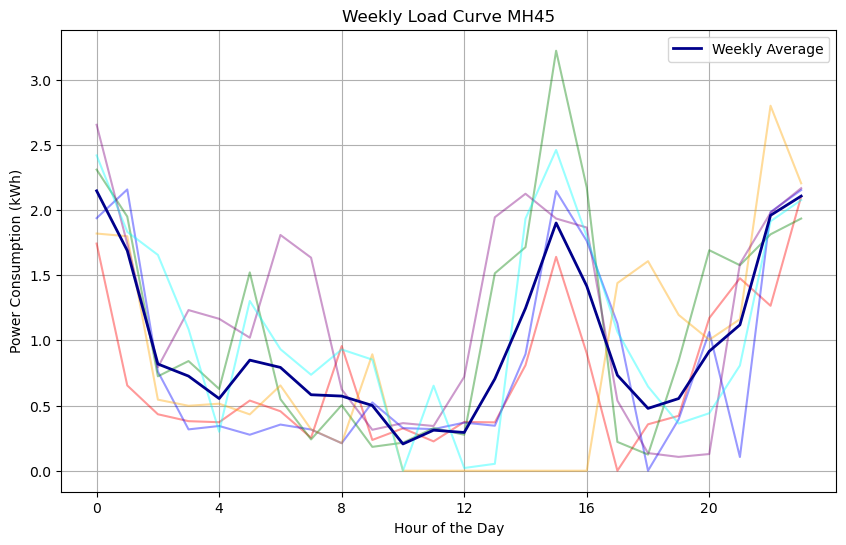

In [23]:
import matplotlib.pyplot as plt

# Ensure 'date' is set as index
weekly_data.set_index('date', inplace=True)

# Calculate the average power consumption for each hour across the 7 days
weekly_avg_load = weekly_data.mean(axis=0)

# Plot the load profiles for all 7 days
plt.figure(figsize=(10, 6))

# Define a list of colors for each day's plot
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

# Plot each day's load profile in a lighter color
for i, (date, load_profile) in enumerate(weekly_data.iterrows()):
    plt.plot(load_profile.index.astype(int), load_profile.values, color=colors[i], alpha=0.4, linestyle='-', label='_nolegend_')

# Plot the weekly average load profile in a darker color
plt.plot(weekly_avg_load.index.astype(int), weekly_avg_load.values, color='darkblue', linestyle='-', linewidth=2, label='Weekly Average')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Power Consumption (kWh)')
plt.title('Weekly Load Curve MH45')

# Customize ticks for x-axis (hours from 0 to 23 with a gap of 4)
plt.xticks(range(0, 24, 4), labels=[str(i) for i in range(0, 24, 4)])

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


#### c. Plot the load profiles for all days of each month, along with the monthly average load curve, for a particular meter in a given year.


In [24]:
load_df = filtered_df.reset_index()
load_df['date'] = pd.to_datetime(load_df['date'])
load_df['Month'] = load_df['date'].dt.month
load_df['Year'] = load_df['date'].dt.year

In [25]:
load_df.set_index(['meter', 'date', 'Month', 'Year'], inplace=True)

In [26]:
load_df.head()

hour                            0      1      2      3      4      5      6   \
meter date       Month Year                                                    
BR02  2019-07-10 7     2019  0.405  0.446  0.447  0.450  0.454  0.454  0.288   
      2019-07-11 7     2019  0.128  0.033  0.085  0.001  0.000  0.000  0.000   
      2019-07-13 7     2019  0.502  0.498  0.493  0.490  0.462  0.334  0.296   
      2019-07-14 7     2019  0.477  0.437  0.405  0.343  0.301  0.108  0.165   
      2019-07-15 7     2019  0.450  0.431  0.393  0.386  0.384  0.029  0.095   

hour                            7      8      9   ...     14     15     16  \
meter date       Month Year                       ...                        
BR02  2019-07-10 7     2019  0.263  0.239  0.298  ...  0.257  0.219  0.124   
      2019-07-11 7     2019  0.000  0.000  0.000  ...  0.516  0.399  0.428   
      2019-07-13 7     2019  0.252  0.141  0.571  ...  0.253  0.250  0.187   
      2019-07-14 7     2019  0.093  0.059  0.040  ...  0.032  0.213  0.000   
      2019-07-15 7     2019  0.114  0.051  0.167  ...  0.304  0.053  0.000   

hour                            17     18     19     20     21     22     23  
meter date       Month Year                                                   
BR02  2019-07-10 7     2019  0.154  0.442  0.127  0.221  0.309  0.378  0.216  
      2019-07-11 7     2019  0.402  0.321  0.303  0.348  0.108  0.001  0.000  
      2019-07-13 7     2019  0.100  0.000  0.000  0.000  0.000  0.007  0.434  
      2019-07-14 7     2019  0.000  0.000  0.413  0.139  0.388  0.429  0.432  
      2019-07-15 7     2019  0.000  0.054  0.271  0.172  0.169  0.216  0.233  

[5 rows x 24 columns]

In [27]:
def plot_lp(monthly_data, ax):
    # Calculate the average power consumption for each hour across the 7 days
    monthly_avg_load = monthly_data.mean(axis=0)

    # Define a list of colors for each day's plot (lighter using alpha)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

    # Plot each day's load profile
    for i, (date, load_profile) in enumerate(monthly_data.iterrows()):
        ax.plot(load_profile.index, load_profile.values, color=colors[i%len(colors)], alpha=0.4, linestyle='-', label='_nolegend_')

    # Plot the weekly average load profile in a darker color
    ax.plot(monthly_avg_load.index, monthly_avg_load.values, color='darkblue', linestyle='-', linewidth=2,  label='Weekly Average')

    # Customize ticks for x-axis (hours from 0 to 23 with a gap of 4)
    ax.set_xticks(range(0, 24, 4))
    ax.set_xticklabels([str(i) for i in range(0, 24, 4)])

    # Show grid and legend
    ax.grid(True)
    ax.legend()


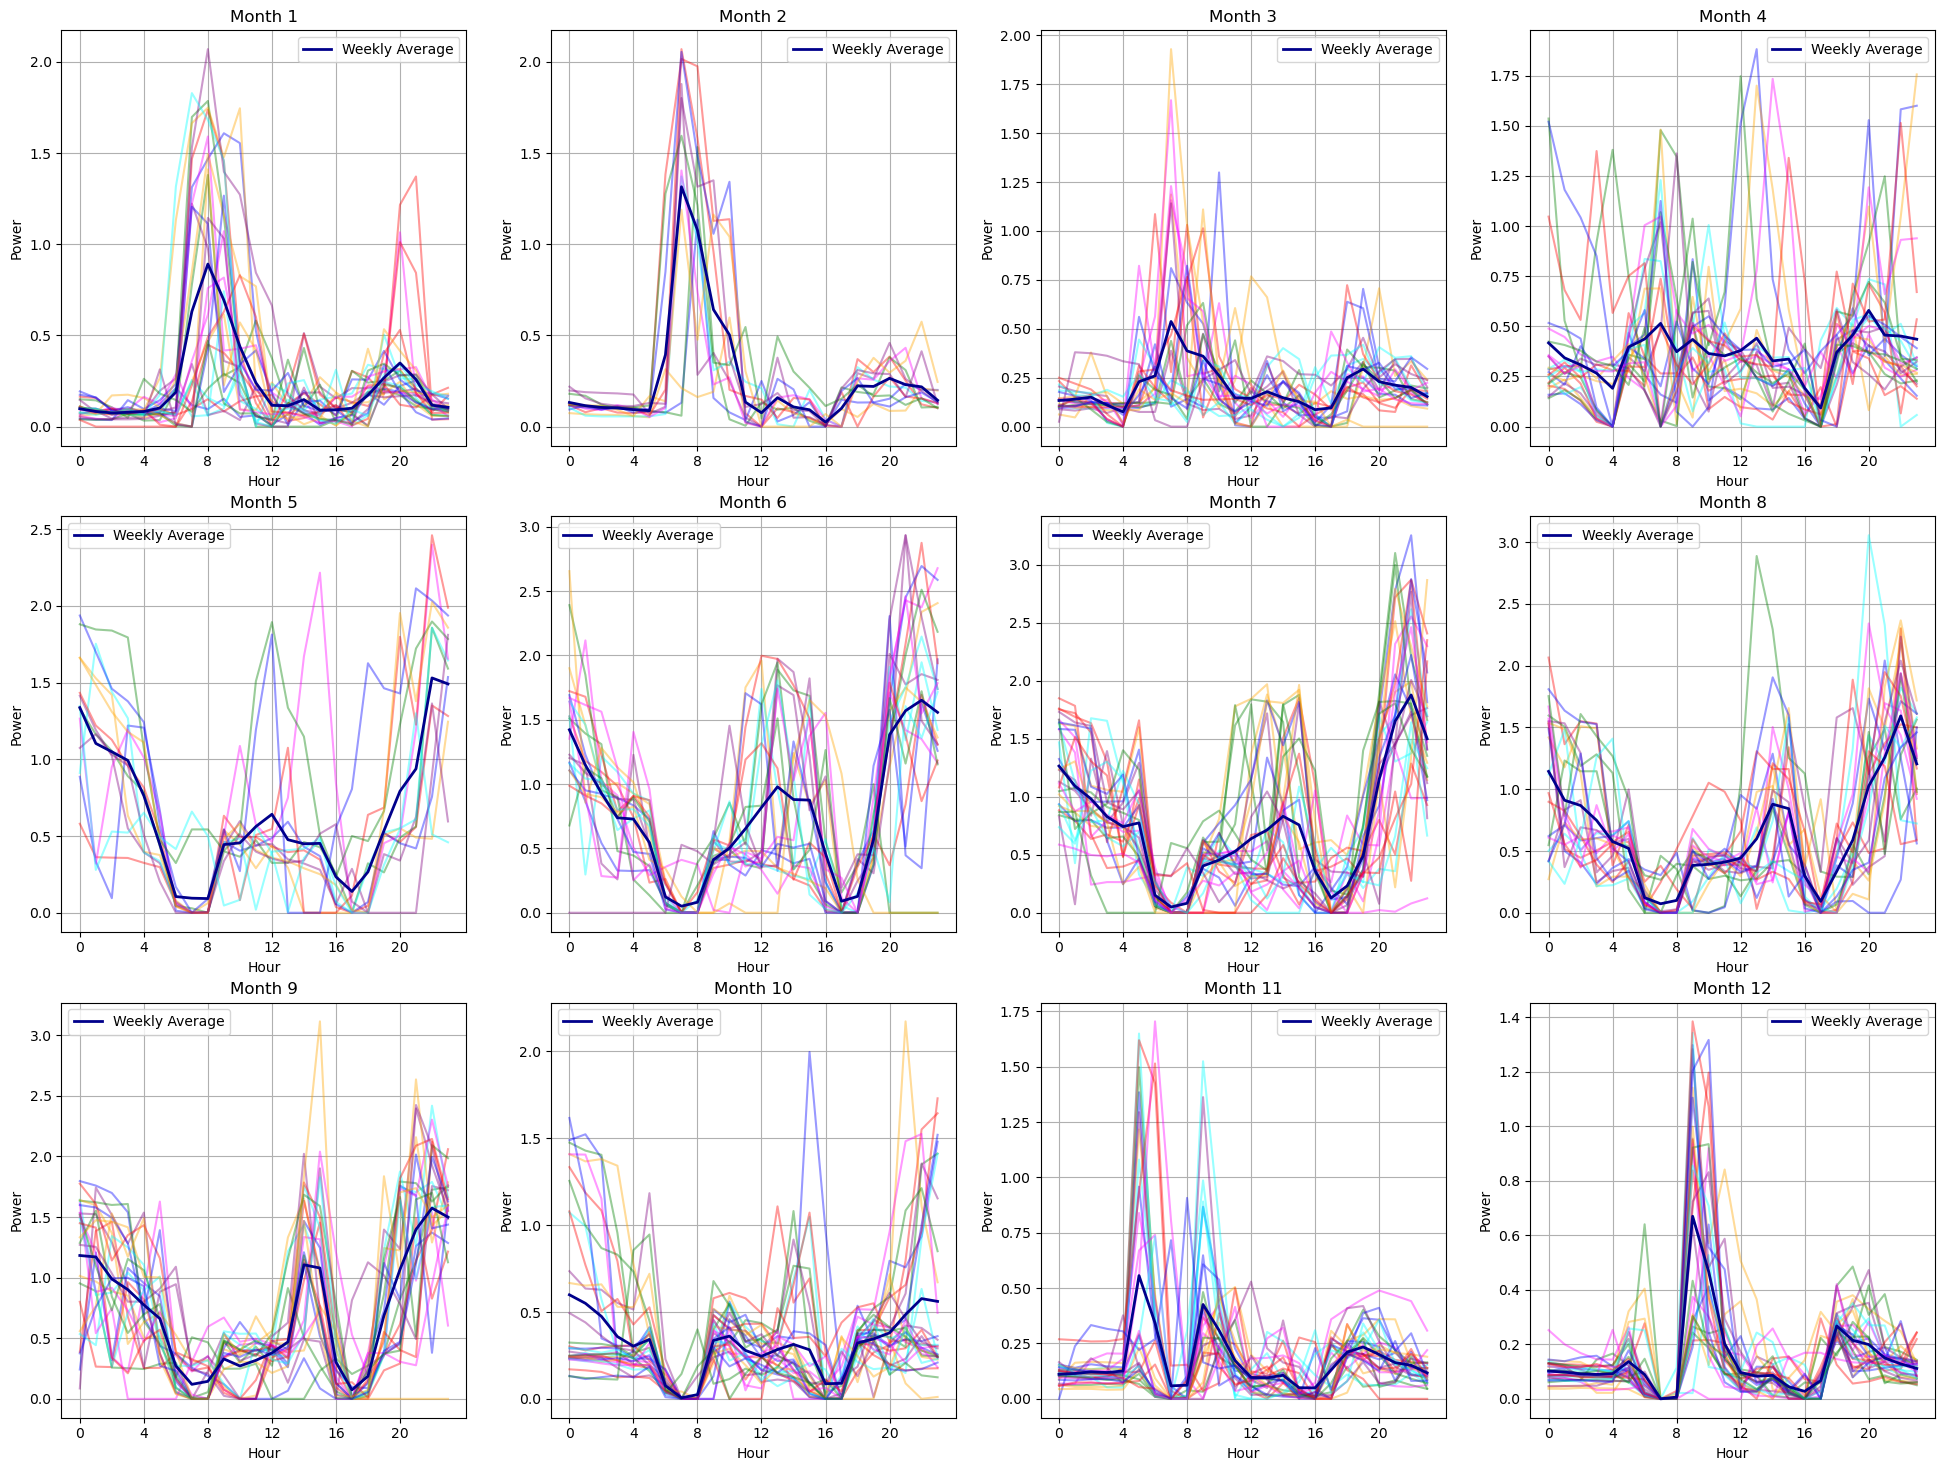

In [28]:
import matplotlib.pyplot as plt

# Define the number of columns and rows for the subplot grid
ncols = 4
nrows = 3

# Create a figure and axes with the specified grid layout
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
fig.tight_layout(pad=3.0)  # Adjust padding between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(1,13):
    # Filter data for the specific 'meter_id' and the date range (1 week)
    monthly_data = load_df.loc[
        (load_df.index.get_level_values('meter') == 'MH45') & 
        (load_df.index.get_level_values('Month') == i) & 
        (load_df.index.get_level_values('Year') == 2020)
    ]
    
    # Use the corresponding axis for the current plot
    ax = axes[i-1]

    # Plot the data
    plot_lp(monthly_data, ax=ax)
    
    # Add labels and title using 'set_' methods
    ax.set_xlabel('Hour')  
    ax.set_ylabel('Power') 
    ax.set_title(f'Month {i}')


# Show the plots
plt.show()


#### d. Plot the monthly average load curves for a particular meter in a given year.

In [29]:
import matplotlib.pyplot as plt

def plot_lp_single(df, i, plt):
    # Calculate the average power consumption for each hour across the days
    monthly_avg_load = df.mean(axis=0)

    # Define a list of colors for each day's plot (lighter using alpha)
    colors = ['red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'blue', 'brown', 'pink', 'gray', 'olive', 'teal']

    # Plot the monthly average load profile in a darker color
    plt.plot(monthly_avg_load.index, monthly_avg_load.values, color=colors[(i-1) % len(colors)], linestyle='-', linewidth=2)



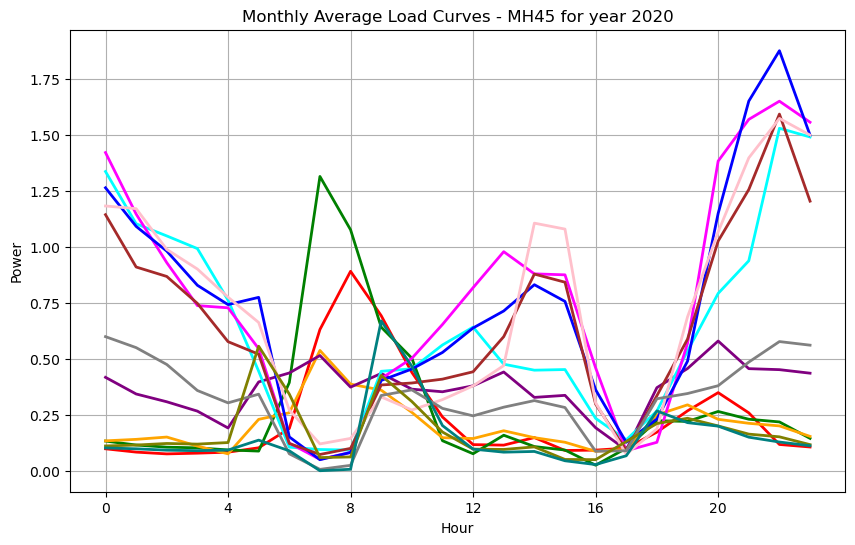

In [30]:
# Create a single plot
plt.figure(figsize=(10, 6))

for i in range(1, 13):
    # Filter data for the specific 'meter_id' and the date range (1 week)
    monthly_data = load_df.loc[
        (load_df.index.get_level_values('meter') == 'MH45') & 
        (load_df.index.get_level_values('Month') == i) & 
        (load_df.index.get_level_values('Year') == 2020)
    ]
    
    # Use the corresponding axis for the current plot
    plot_lp_single(monthly_data, i, plt)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Power')
plt.title('Monthly Average Load Curves - MH45 for year 2020')

# Customize ticks for x-axis (hours from 0 to 23 with a gap of 4)
plt.xticks(range(0, 24, 4), labels=[str(i) for i in range(0, 24, 4)])

# Show grid and legend
plt.grid(True)

# Display the plot
plt.show()

#### e. Plot the average load profile for all meters over the entire duration.


In [31]:
meters = df['meter'].unique()

In [32]:
def meter_lp(df, i, plt):
    # Calculate the average power consumption for each hour across the days
    monthly_avg_load = df.mean(axis=0)

    # Define a list of colors for each day's plot (lighter using alpha)
    colors = ['red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'blue', 'brown', 'pink', 'gray', 'olive', 'teal']

    # Plot the monthly average load profile in a darker color
    plt.plot(monthly_avg_load.index, monthly_avg_load.values, color=colors[i % len(colors)], alpha=0.4, linestyle='-', linewidth=2)



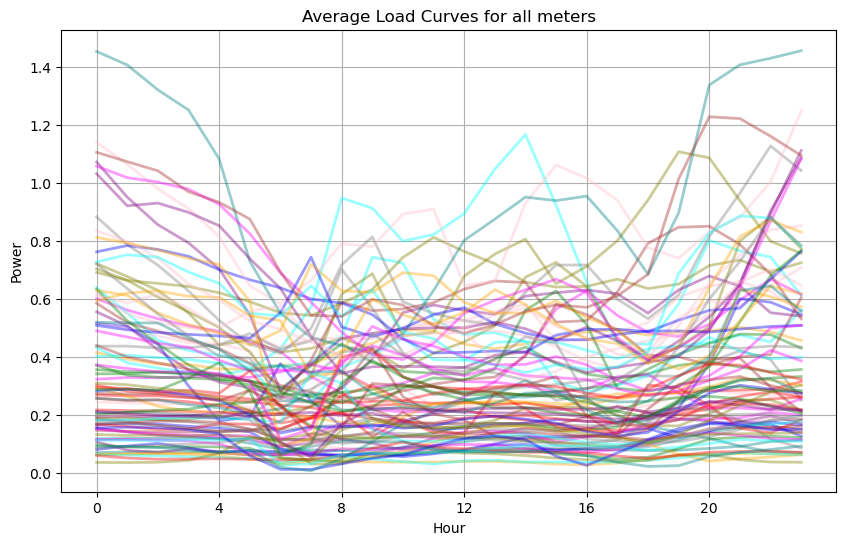

In [33]:
# Create a single plot
plt.figure(figsize=(10, 6))

for i in range(len(meters)):
    # Filter data for the specific 'meter_id' and the date range (1 week)
    monthly_data = load_df.loc[
        (load_df.index.get_level_values('meter') == meters[i])]
    
    # Use the corresponding axis for the current plot
    meter_lp(monthly_data, i, plt)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Power')
plt.title('Average Load Curves for all meters')

# Customize ticks for x-axis (hours from 0 to 23 with a gap of 4)
plt.xticks(range(0, 24, 4), labels=[str(i) for i in range(0, 24, 4)])

# Show grid and legend
plt.grid(True)

# Display the plot
plt.show()


## 4. Voltage Analysis

For this analysis, use only the data from May to October 2019, similar to the results reported in the CEEW report

#### a. Print the describtive statistics of Voltage (z_Avg Voltage)

In [34]:
start_date = '2019-05-01'
end_date = '2019-10-31'


In [35]:
df['x_Timestamp'] = pd.to_datetime(df['x_Timestamp'])

In [36]:
voltage_data = df[(df['x_Timestamp'] >= start_date) & (df['x_Timestamp'] <= end_date)].copy()

In [37]:
#df_v = df.copy()
voltage_data['z_Avg Voltage (Volt)'].describe()

count    4.476908e+06
mean     2.215851e+02
std      6.685348e+01
min      0.000000e+00
25%      2.291200e+02
50%      2.419100e+02
75%      2.511900e+02
max      6.545000e+02
Name: z_Avg Voltage (Volt), dtype: float64

#### b. Plot the average outage hours per day for each meter (similar to Figure 5 in the CEEW report)

Note that voltage readings should be approximately 230V in each sample. If the voltage is 0, you can consider those time intervals as outage periods. So, you can count those 

In [38]:
voltage_data['Date'] = voltage_data['x_Timestamp'].dt.date


In [39]:
# Function to assign location based on meter name
def assign_location(meter_name):
    if 'B' in meter_name:
        return 'Bareilly'
    elif 'M' in meter_name:
        return 'Mathura'
    else:
        return 'Unknown'

# Add new column 'Location'
voltage_data['Location'] = voltage_data['meter'].apply(assign_location)

# Display the updated DataFrame
voltage_data.head()

,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter,Date,Location
0,2019-07-10 00:00:00,0.021,243.10,1.79,50.02,BR02,2019-07-10,Bareilly
1,2019-07-10 00:03:00,0.021,242.91,1.80,50.07,BR02,2019-07-10,Bareilly
2,2019-07-10 00:06:00,0.021,242.46,1.83,50.00,BR02,2019-07-10,Bareilly
3,2019-07-10 00:09:00,0.020,241.27,1.79,49.95,BR02,2019-07-10,Bareilly
4,2019-07-10 00:12:00,0.020,240.77,1.79,49.98,BR02,2019-07-10,Bareilly


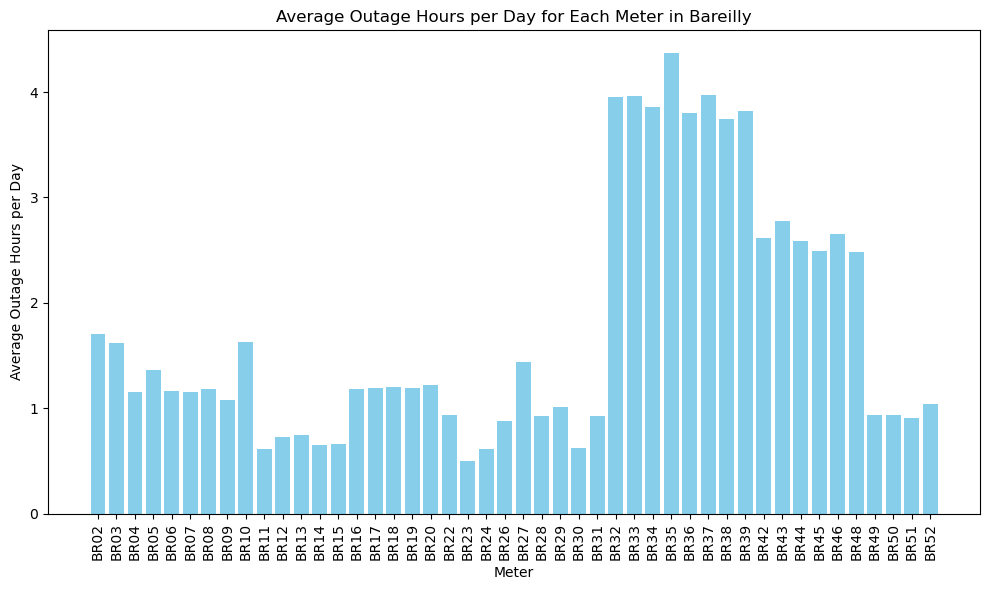

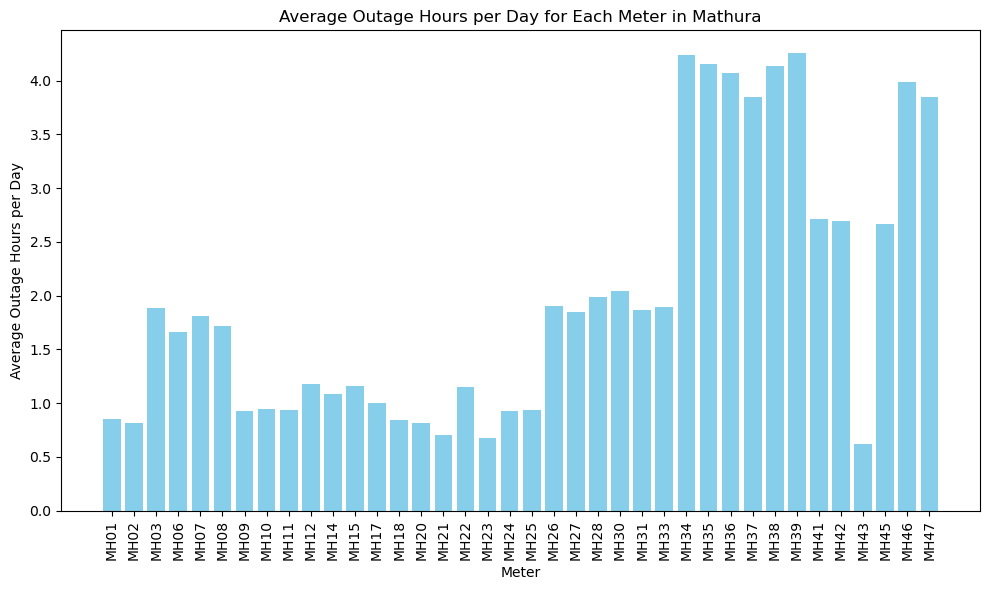

In [40]:
import matplotlib.pyplot as plt

# Define voltage outage threshold
voltage_threshold = 0  

# As data is recorded at 3-minute intervals
interval_in_hours = 3 / 60

# Identify outages
voltage_data['is_outage'] = voltage_data['z_Avg Voltage (Volt)'] == voltage_threshold

# Calculate the number of outage intervals per day for each meter
outage_intervals_per_day = voltage_data.groupby(['meter', 'Date', 'Location'])['is_outage'].sum().reset_index()

# Convert outage intervals to hours (by multiplying by the interval duration)
outage_intervals_per_day['outage_hours'] = outage_intervals_per_day['is_outage'] * interval_in_hours

# Calculate the average outage hours per day for each meter, grouped by location
average_outage_hours = outage_intervals_per_day.groupby(['Location', 'meter'])['outage_hours'].mean().reset_index()

# Rename the columns for clarity
average_outage_hours.columns = ['Location', 'Meter', 'Avg Outage Hours per Day']

# Create separate plots for each city
for location in average_outage_hours['Location'].unique():
    location_data = average_outage_hours[average_outage_hours['Location'] == location]
    
    # Plot the data using a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(location_data['Meter'], location_data['Avg Outage Hours per Day'], color='skyblue')
    
    # Add labels and title
    plt.xlabel('Meter')
    plt.ylabel('Average Outage Hours per Day')
    plt.title(f'Average Outage Hours per Day for Each Meter in {location}')
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

#### c. Plot the proportion of total outage percentage for different intervals: 0-6 hours, 6-10 hours, 10-14 hours, 14-18 hours, 18-21 hours, and 21-24 hours (similar to Figure 5 in the CEEW report).

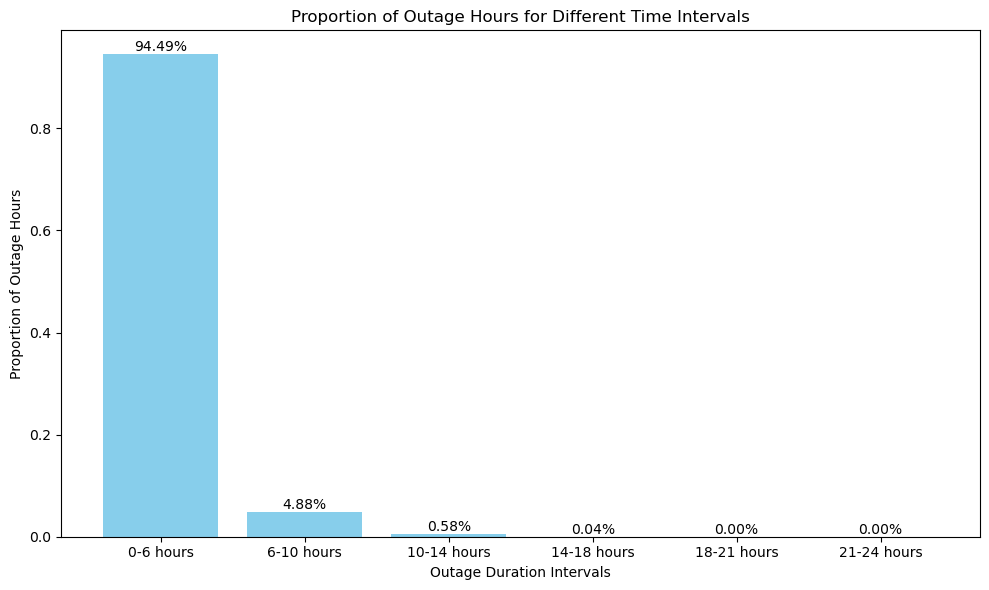

In [41]:
# Define voltage outage threshold
voltage_threshold = 0

# As the data is recorded at 3-minute intervals 
interval_in_hours = 3 / 60  

# Identify outages
voltage_data['is_outage'] = voltage_data['z_Avg Voltage (Volt)'] == voltage_threshold

# Calculate the number of outage intervals per day for each meter
outage_intervals_per_day = voltage_data.groupby(['meter', 'Date'])['is_outage'].sum().reset_index()

# Convert outage intervals to hours (by multiplying by the interval duration)
outage_intervals_per_day['outage_hours'] = outage_intervals_per_day['is_outage'] * interval_in_hours

# Define the intervals for categorization
bins = [0, 6, 10, 14, 18, 21, 24]
labels = ['0-6 hours', '6-10 hours', '10-14 hours', '14-18 hours', '18-21 hours', '21-24 hours']

# Categorize outage hours into the defined intervals
outage_intervals_per_day['outage_category'] = pd.cut(outage_intervals_per_day['outage_hours'], bins=bins, labels=labels, right=False)

# Calculate the proportion of total outages in each interval
outage_proportion = outage_intervals_per_day['outage_category'].value_counts(normalize=True).sort_index()

# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(outage_proportion.index, outage_proportion, color='skyblue')

# Add labels and title
plt.xlabel('Outage Duration Intervals')
plt.ylabel('Proportion of Outage Hours')
plt.title('Proportion of Outage Hours for Different Time Intervals')

# Display numeric values over each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


#### d. Plot the variation of voltage for different months for the both the locations

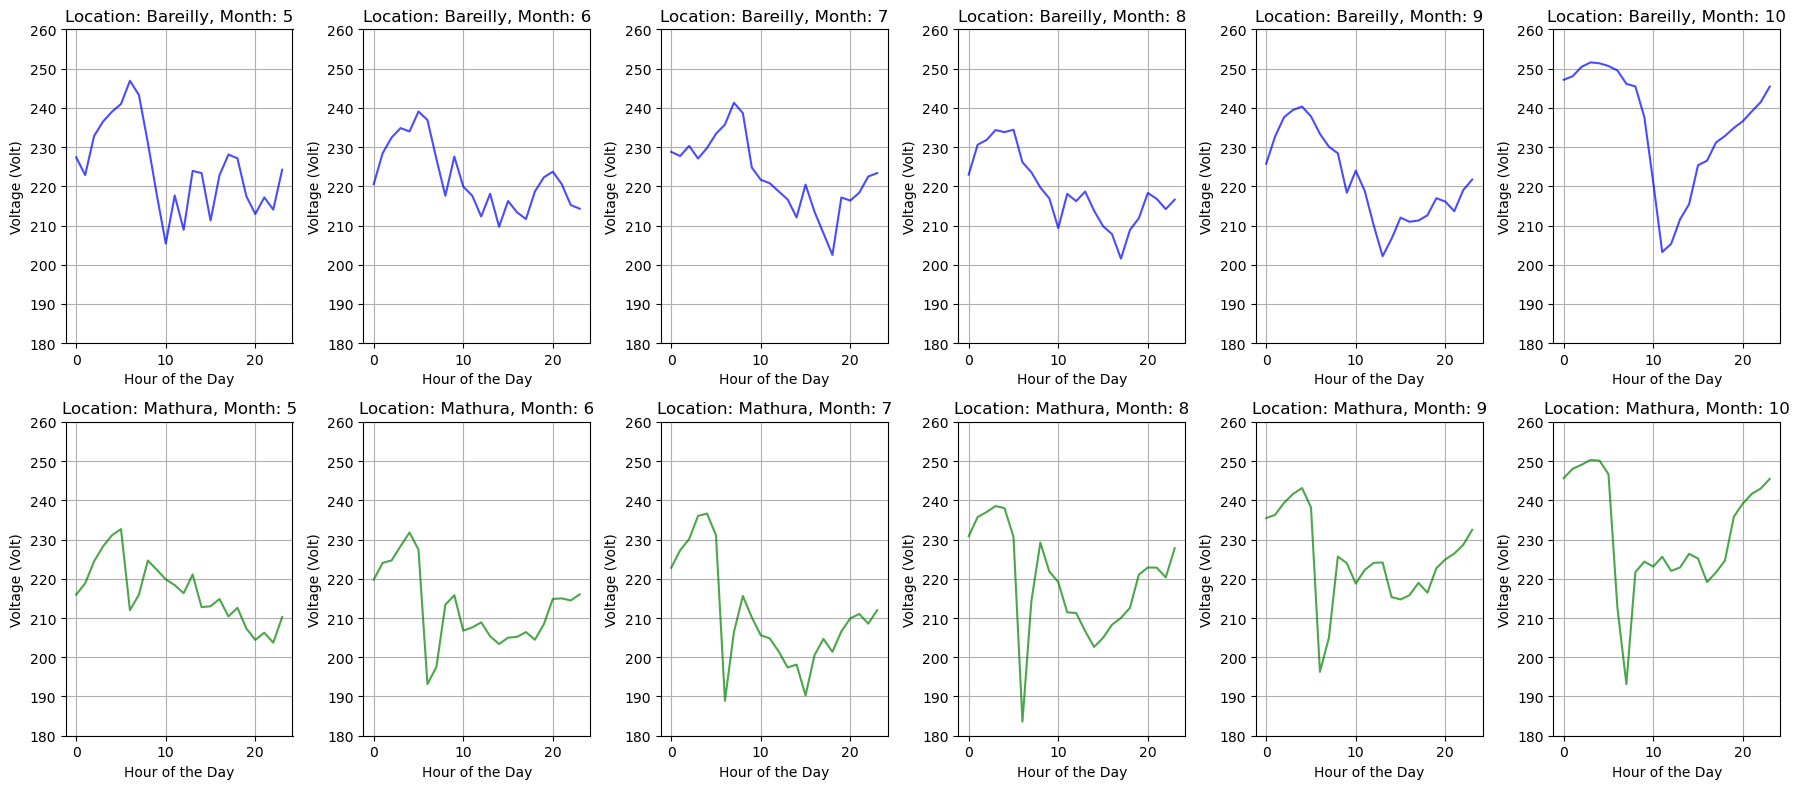

In [42]:
voltage_data['Month'] = voltage_data['x_Timestamp'].dt.month

# Define colors for each location
location_colors = {'Bareilly': 'blue', 'Mathura': 'green'}  

# Filter data for the months May to October
months_of_interest = range(5, 11)  # May (5) to October (10)

# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))
fig.tight_layout(pad=3.0)  # Adjust padding between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over unique locations
for idx, location in enumerate(voltage_data['Location'].unique()):
    location_data = voltage_data[voltage_data['Location'] == location]
    
    # Plot for each month
    for month_idx, month in enumerate(months_of_interest):
        ax = axes[idx * 6 + month_idx]  # Select the appropriate subplot
        
        # Filter data for the specific month and location
        month_location_data = voltage_data[(voltage_data['Month'] == month) & (voltage_data['Location'] == location)]

        # Calculate the average load profile (assuming hourly data here; adjust as needed)
        hourly_avg_voltage = month_location_data.groupby(month_location_data['x_Timestamp'].dt.hour)['z_Avg Voltage (Volt)'].mean()

        # Plot the load profile
        ax.plot(hourly_avg_voltage.index, hourly_avg_voltage.values, label=f'{location} - Month {month}', 
                color=location_colors[location], linestyle='-', alpha=0.7)
        
        ax.set_title(f'Location: {location}, Month: {month}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Voltage (Volt)')
        ax.set_ylim(180, 260)
        ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


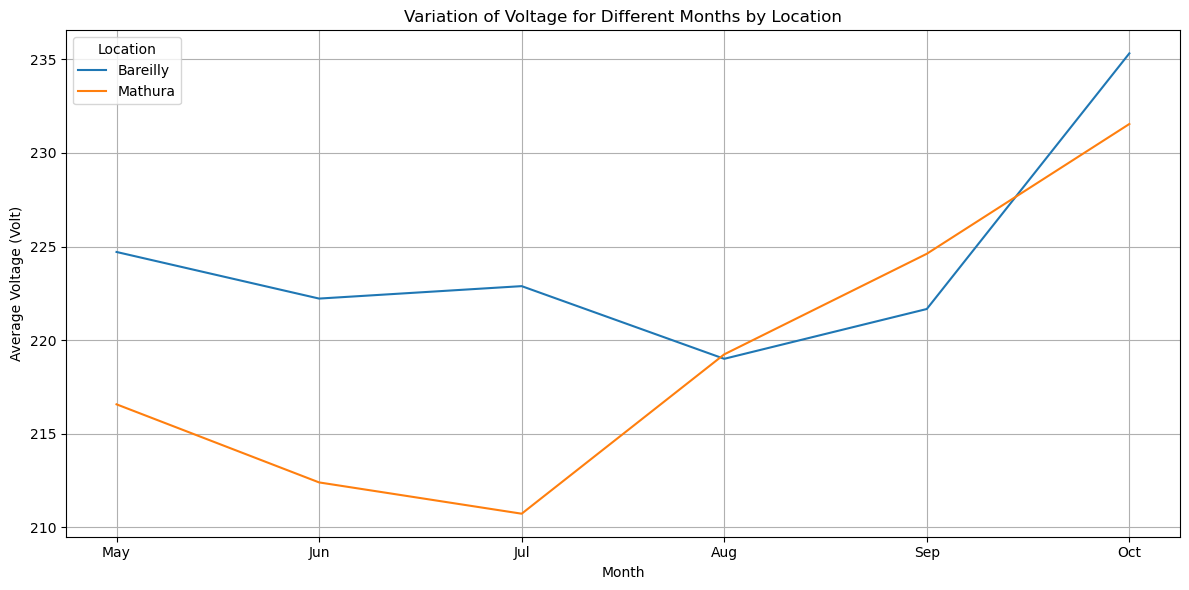

In [43]:
# Ensure 'Month' and 'Location' are the index
voltage_data.reset_index(inplace=True)

# Plot the variation of voltage for different months for both locations
plt.figure(figsize=(12, 6))

# Iterate over unique locations
for location in voltage_data['Location'].unique():
    location_data = voltage_data[voltage_data['Location'] == location]
    monthly_avg_voltage = location_data.groupby('Month')['z_Avg Voltage (Volt)'].mean()
    
    plt.plot(monthly_avg_voltage.index, monthly_avg_voltage.values, label=location)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Voltage (Volt)')
plt.title('Variation of Voltage for Different Months by Location')

# Add legend
plt.legend(title='Location')

# Customize x-axis to show month names instead of numbers
plt.xticks(range(5, 11), ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Power consumption analysis

#### a. Plot the monthly electricity consumption as boxplot for each city (Reproduce Figure 11).

In [44]:
import seaborn as sns

In [45]:
df['x_Timestamp'] = pd.to_datetime(df['x_Timestamp'])

In [46]:
p_data = df[(df['x_Timestamp'] >= start_date) & (df['x_Timestamp'] <= end_date)].copy()

In [47]:
p_data['date'] = p_data['x_Timestamp'].dt.date
p_data['month'] = p_data['x_Timestamp'].dt.month

In [48]:
p_data = p_data.drop(columns=['x_Timestamp', 'date'])
p_data = p_data.groupby(["month" , "meter"]).sum()

In [49]:
p_data = p_data.reset_index()

In [50]:
power = p_data.pivot_table(index=["meter"], columns='month' , values='t_kWh' ,  fill_value=0)
power = power.reset_index()

In [51]:
power

month,meter,5,6,7,8,9,10
0,BR02,0.000,0.000,63.876,172.550,145.425,113.150
1,BR03,0.000,0.000,84.877,291.846,236.950,135.043
2,BR04,0.000,0.000,114.188,399.240,309.381,190.344
3,BR05,0.000,0.000,29.155,56.508,84.471,43.631
4,BR06,0.000,0.000,125.480,481.950,435.069,451.972
...,...,...,...,...,...,...,...
79,MH42,17.019,292.630,203.597,249.107,277.076,157.589
80,MH43,52.126,718.961,382.351,440.534,504.965,346.123
81,MH45,48.913,683.780,340.528,420.845,587.344,188.932
82,MH46,30.801,296.837,222.674,174.263,180.486,105.566


In [52]:
# Function to assign location based on meter name
def assign_location(meter_name):
    if 'B' in meter_name:
        return 'Bareilly'
    elif 'M' in meter_name:
        return 'Mathura'
    else:
        return 'Unknown'

# Add new column 'Location'
power['Location'] = power['meter'].apply(assign_location)

In [53]:
power = power.drop(columns=['meter'])

In [54]:
power

month,5,6,7,8,9,10,Location
0,0.000,0.000,63.876,172.550,145.425,113.150,Bareilly
1,0.000,0.000,84.877,291.846,236.950,135.043,Bareilly
2,0.000,0.000,114.188,399.240,309.381,190.344,Bareilly
3,0.000,0.000,29.155,56.508,84.471,43.631,Bareilly
4,0.000,0.000,125.480,481.950,435.069,451.972,Bareilly
...,...,...,...,...,...,...,...
79,17.019,292.630,203.597,249.107,277.076,157.589,Mathura
80,52.126,718.961,382.351,440.534,504.965,346.123,Mathura
81,48.913,683.780,340.528,420.845,587.344,188.932,Mathura
82,30.801,296.837,222.674,174.263,180.486,105.566,Mathura


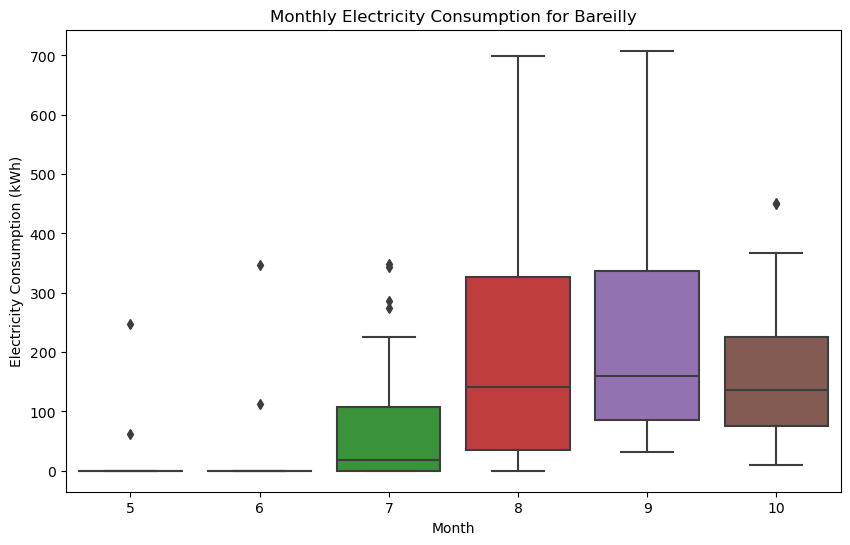

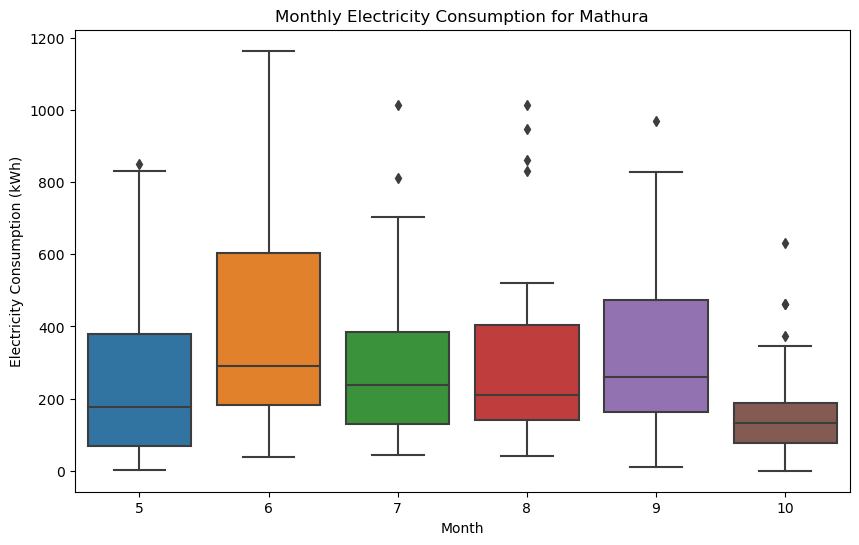

In [55]:
# Extract the month and location columns and the electricity consumption column
#monthly_data = power_data[['Month', 'Location', 't_kWh']]

# Get the unique locations
locations = ['Bareilly', 'Mathura']

# Plot for each location
for location in locations:
    # Filter data for the current location
    location_data = power[power['Location'] == location]
    
    # Create a figure for the current location
    plt.figure(figsize=(10, 6))
    
    # Create a boxplot of monthly electricity consumption
    sns.boxplot(data=location_data)
    
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Electricity Consumption (kWh)')
    plt.title(f'Monthly Electricity Consumption for {location}')
    

#### b. Plot the monthly electricity demand for all households in Bareilly and Mathura (Reproduce Figure 12).

In [56]:
power_data = voltage_data.copy()

In [57]:
power_data

,index,x_Timestamp,t_kWh,z_Avg Voltage (Volt),z_Avg Current (Amp),y_Freq (Hz),meter,Date,Location,is_outage,Month
0,0,2019-07-10 00:00:00,0.021,243.10,1.79,50.02,BR02,2019-07-10,Bareilly,False,7
1,1,2019-07-10 00:03:00,0.021,242.91,1.80,50.07,BR02,2019-07-10,Bareilly,False,7
2,2,2019-07-10 00:06:00,0.021,242.46,1.83,50.00,BR02,2019-07-10,Bareilly,False,7
3,3,2019-07-10 00:09:00,0.020,241.27,1.79,49.95,BR02,2019-07-10,Bareilly,False,7
4,4,2019-07-10 00:12:00,0.020,240.77,1.79,49.98,BR02,2019-07-10,Bareilly,False,7
...,...,...,...,...,...,...,...,...,...,...,...
4476903,17060985,2019-10-30 23:48:00,0.008,252.80,0.58,49.99,MH47,2019-10-30,Mathura,False,10
4476904,17060986,2019-10-30 23:51:00,0.007,252.89,0.58,49.96,MH47,2019-10-30,Mathura,False,10
4476905,17060987,2019-10-30 23:54:00,0.007,253.10,0.58,50.02,MH47,2019-10-30,Mathura,False,10
4476906,17060988,2019-10-30 23:57:00,0.008,253.20,0.58,50.02,MH47,2019-10-30,Mathura,False,10


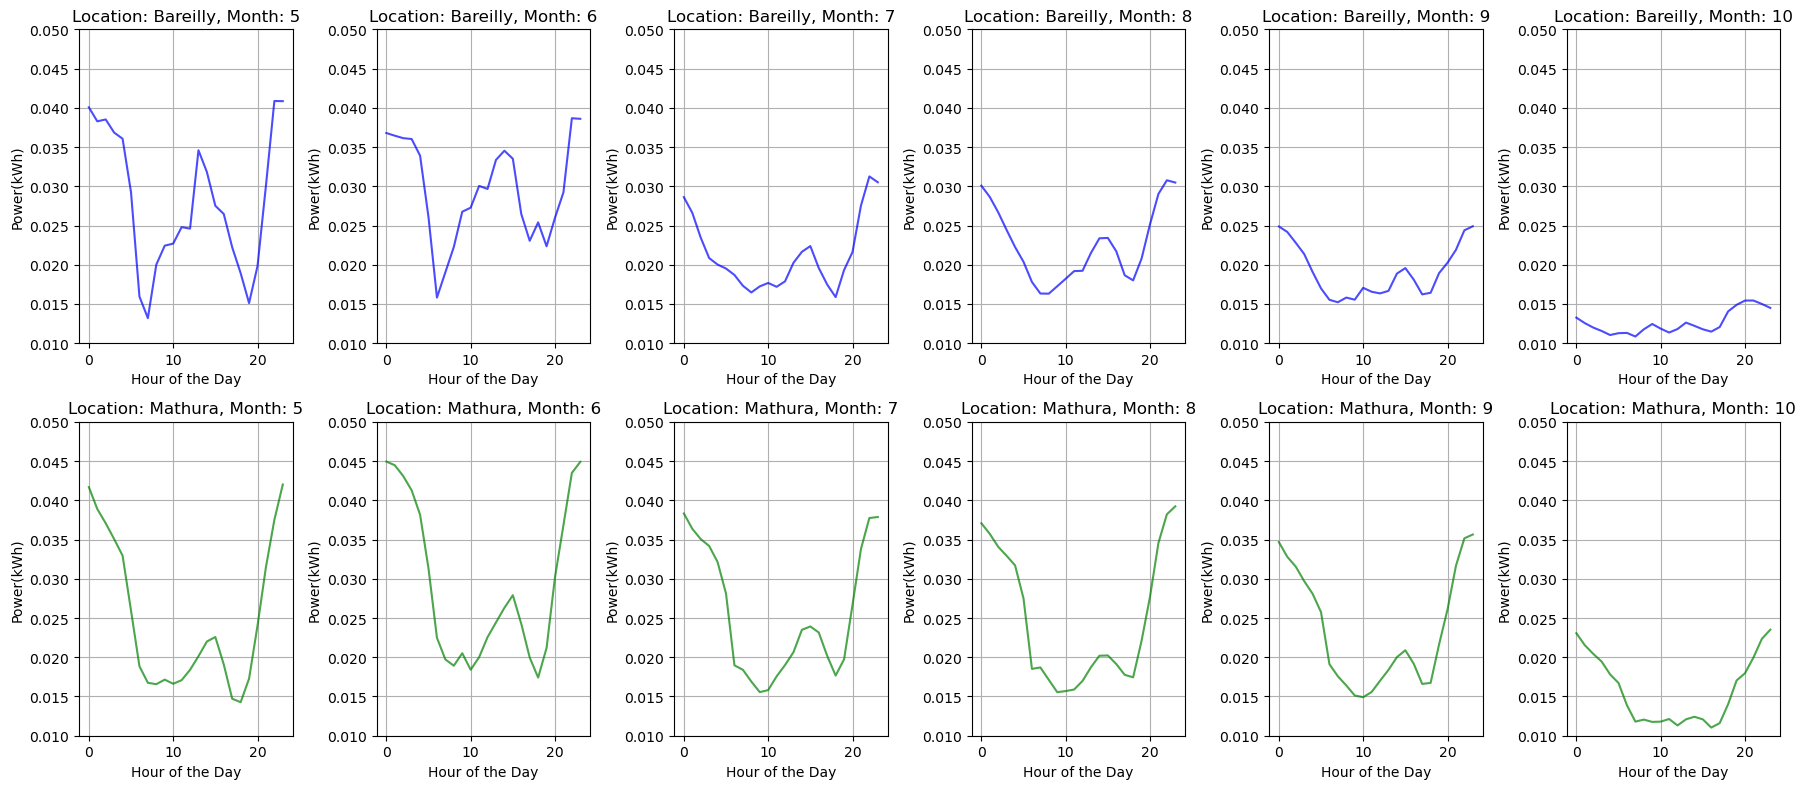

In [58]:

# Filter data for the months May to October
months_of_interest = range(5, 11)  # May (5) to October (10)

# Define colors for each location
location_colors = {'Bareilly': 'blue', 'Mathura': 'green'}  # Adjust as needed

# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))
fig.tight_layout(pad=3.0)  # Adjust padding between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over unique locations
for idx, location in enumerate(power_data['Location'].unique()):
    location_data = power_data[power_data['Location'] == location]
    
    # Plot for each month
    for month_idx, month in enumerate(months_of_interest):
        ax = axes[idx * 6 + month_idx]  # Select the appropriate subplot
        
        # Filter data for the specific month and location
        month_location_data = power_data[(power_data['Month'] == month) & (power_data['Location'] == location)]

        # Calculate the average load profile (assuming hourly data here; adjust as needed)
        hourly_avg_pow = month_location_data.groupby(month_location_data['x_Timestamp'].dt.hour)['t_kWh'].mean()

        # Plot the load profile
        ax.plot(hourly_avg_pow.index, hourly_avg_pow.values, label=f'{location} - Month {month}', color=location_colors[location], linestyle='-', alpha=0.7)
        
        ax.set_title(f'Location: {location}, Month: {month}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Power(kWh)')
        ax.set_ylim(0.01, 0.05)
        ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
